<a href="https://colab.research.google.com/github/sergio-martini/bootcamp_cancer_august2024/blob/main/MLR%20case%20study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
print('import lib complete')
df=pd.read_csv('/content/employee_compensation.csv')
df.head()

import lib complete


,Year_Type,Year,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,42853,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,2015,28248,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,Fiscal,2014,30651,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82
3,Fiscal,2014,19473,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,2013,7176,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62


In [6]:
df.shape


(50000, 12)

In [8]:
# info to understand the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Type            50000 non-null  object 
 1   Year                 50000 non-null  int64  
 2   Employee_Identifier  50000 non-null  int64  
 3   Salaries             50000 non-null  float64
 4   Overtime             50000 non-null  float64
 5   Other_Salaries       50000 non-null  float64
 6   Total_Salary         50000 non-null  float64
 7   Retirement           50000 non-null  float64
 8   Health/Dental        50000 non-null  float64
 9   Other_Benefits       50000 non-null  float64
 10  Total_Benefits       50000 non-null  float64
 11  Total_Compensation   50000 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 4.6+ MB


In [10]:
df.Year.unique() # provides all uniques values in the column

array([2015, 2014, 2013, 2016])

In [11]:
#convert year column from numerical to categorical
df['Year']=df['Year'].astype('object')

In [12]:
df.dtypes

,0
Year_Type,object
Year,object
Employee_Identifier,int64
Salaries,float64
Overtime,float64
Other_Salaries,float64
Total_Salary,float64
Retirement,float64
Health/Dental,float64
Other_Benefits,float64


In [16]:
# remove insignificant variable
df.drop(['Employee_Identifier'],axis=1,inplace=True) #axis=1 column based removal, inplace=True, remove the column from original dataset permennetly


KeyError: "['Employee_Identifier'] not found in axis"

In [18]:
df.head(2)

,Year_Type,Year,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,92288.22,267.45,267.45,92823.12,20700.2,12500.56,7605.75,40806.51,133629.63
1,Calendar,2015,1466.38,348.23,0.00,1814.61,0.0,442.03,141.59,583.62,2398.23


<Figure size 1000x500 with 0 Axes>

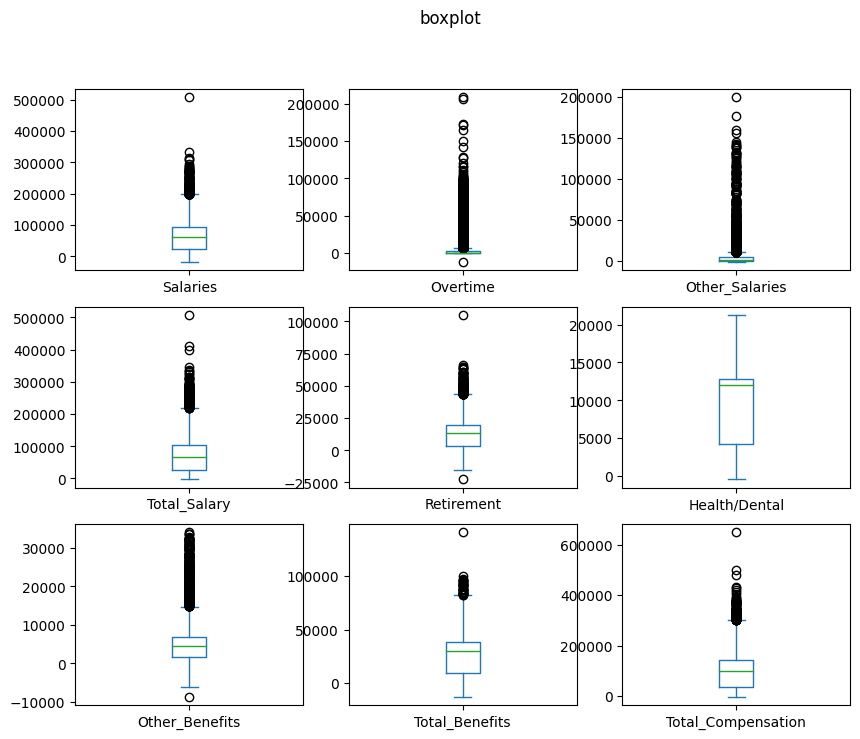

In [23]:
from re import sub
#outliner analysis and treatment
# create a box plot to check presence of outliers
plt.figure(figsize=(10,5))
#df.boxplot()
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,8),title='boxplot',sharey=False)
#plt.xticks(rotation=90)
plt.show()

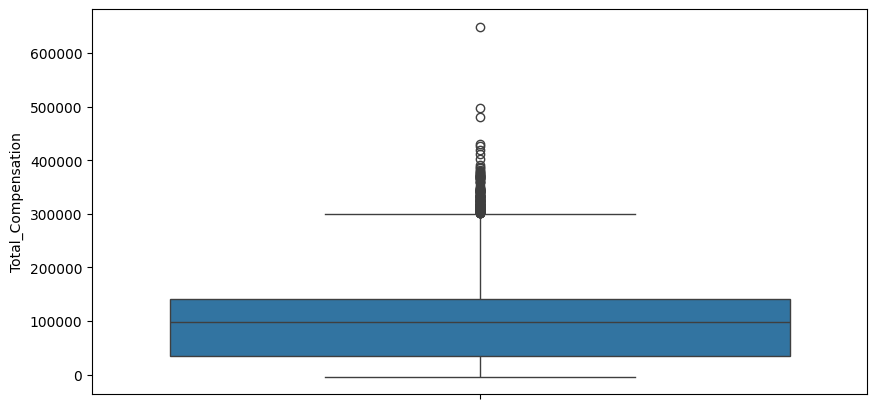

In [26]:
from re import sub
#outliner analysis and treatment
# create a box plot to check presence of outliers
plt.figure(figsize=(10,5))
sns.boxplot(df['Total_Compensation'])
#df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,8),title='boxplot',sharey=False)
#plt.xticks(rotation=90)
plt.show()

# the total compensation has most of the salary less than tha 1Lac and also there many extreme salaries are present

In [34]:
df1=df.select_dtypes(include=np.number)
df1.head(2)

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,92288.22,267.45,267.45,92823.12,20700.2,12500.56,7605.75,40806.51,133629.63
1,1466.38,348.23,0.00,1814.61,0.0,442.03,141.59,583.62,2398.23


In [35]:
# remove outliers based on IQR value
# inter quantile range
Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)
IQR=Q3-Q1
df1=df1[~((df1<(Q1-1.5*IQR))|(df1>(Q3+1.5*IQR))).any(axis=1)]
df1.shape


(37721, 9)

In [36]:
df1.isnull().sum() #check missing value , no missing value present

,0
Salaries,0
Overtime,0
Other_Salaries,0
Total_Salary,0
Retirement,0
Health/Dental,0
Other_Benefits,0
Total_Benefits,0
Total_Compensation,0


In [39]:
#split the datainto the target and inputs
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1:]
print(x.shape)
print(y.shape)

(37721, 8)
(37721, 1)


In [43]:
# standardise the x variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x.iloc[:,:]=sc.fit_transform(x.iloc[:,:])

x.head(2)

<ipython-input-43-dfe6c25377f0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.iloc[:,:]=sc.fit_transform(x.iloc[:,:])


,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits
0,0.983501,-0.228094,-0.474925,0.926924,1.178509,0.916577,1.145330,1.160937
1,-1.252282,-0.167554,-0.587284,-1.263232,-1.180545,-1.491481,-1.259987,-1.365209


In [44]:
# split train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30176, 8)
(7545, 8)
(30176, 1)
(7545, 1)


assumptions of multilinear model
1. assumptions of dependent varible: assumption on dependent varible is that dependent varibel should be numeric
2. no or little mutlicollineraity: when there are large number of independent varibel presnt in dataset, tehre is a possibility that such indeoendet varible will be strongly corelated. The presence of strong correlation between independet varible is called multi collinearity, presnece of MC can be destablize the regression model, this presence of mc has to be detectd and corrected
we can use VIF to check mc



In [46]:
# build a ml model using stats library
import statsmodels.api as sm
x_train=sm.add_constant(x_train)
MLR_model=sm.OLS(y_train,x_train).fit()
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Compensation   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.063e+33
Date:                Fri, 25 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:19:09   Log-Likelihood:             6.6161e+05
No. Observations:               30176   AIC:                        -1.323e+06
Df Residuals:                   30169   BIC:                        -1.323e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7.663e+04   4.19e-13   1.83e+17      0.000    7.66e+04    7.66e+04
Salaries        2.073e+04   8.01e-13   2.59e+16      0.000    2.07e+04    2.07e+04
Overtime         680.7894   4.53e-13    1.5e+15      0.000     680.789     680.789
Other_Salaries  1214.4609   4.62e-13   2.63e+15      0.000    1214.461    1214.461
Total_Salary    2.035e+04   7.79e-13   2.61e+16      0.000    2.04e+04    2.04e+04
Retirement      6091.1128   1.19e-12   5.14e+15      0.000    6091.113    6091.113
Health/Dental   3476.0609   7.82e-13   4.45e+15      0.000    3476.061    3476.061
Other_Benefits  2154.1132   9.08e-13   2.37e+15      0.000    2154.113    2154.113
Total_Benefits  4869.7666   5.48e-13   8.89e+15      0.000    4869.767    4869.767
==============================================================================
Omnibus:                     8381.816   Durbin-Watson:                   1.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34168.149
Skew:                           1.327   Prob(JB):                         0.00
Kurtosis:                       7.487   Cond. No.                     1.92e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.59e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

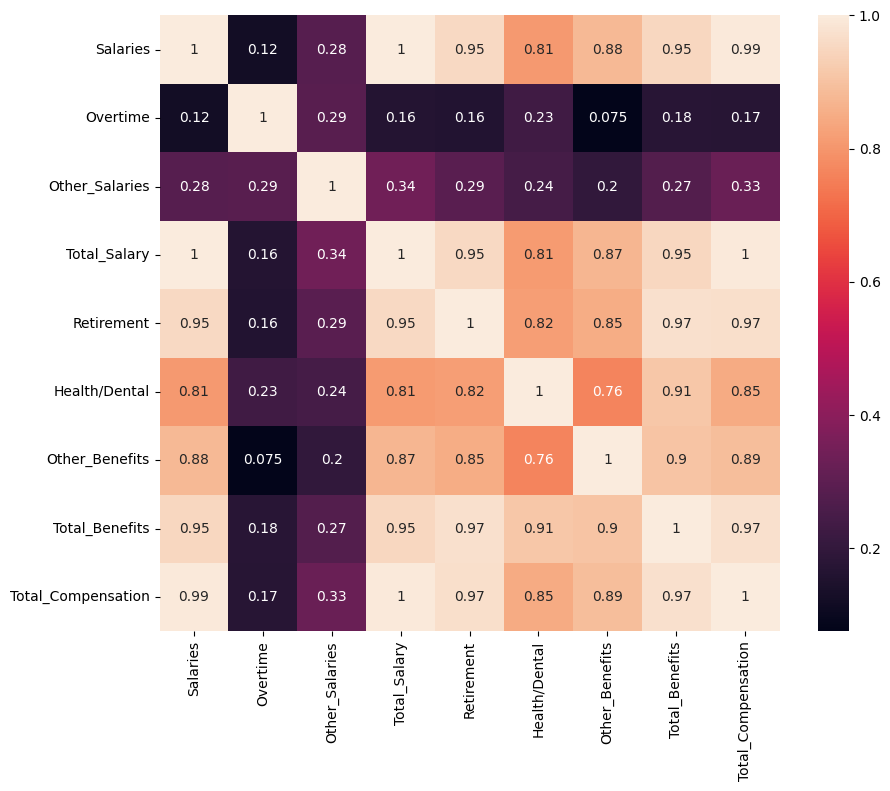

In [47]:
# plot heat map to check coreelation between independent varibles
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True)
plt.show()